# Happiness and World Bank Income inequality Gini measure combined by J.Ward 

In [1]:
#load needed data liberary and KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### show first 2 rows of data

In [2]:
df = pd.read_csv('happyscore_income.csv')#load data

In [3]:
df.head(2)#retriev first 2 rows of data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
country                  111 non-null object
adjusted_satisfaction    111 non-null float64
avg_satisfaction         111 non-null float64
std_satisfaction         111 non-null float64
avg_income               111 non-null float64
median_income            111 non-null float64
income_inequality        111 non-null float64
region                   111 non-null object
happyScore               111 non-null float64
GDP                      111 non-null float64
country.1                111 non-null object
dtypes: float64(8), object(3)
memory usage: 9.6+ KB


In [5]:
income = np.array(df['avg_income'])

In [6]:
sat = np.array(df['avg_satisfaction'])

In [7]:
np.mean(sat, 0)

5.936936936936936

In [8]:
np.mean(income, 0)

6442.75141621464

In [9]:
np.std(sat, 0)

1.3502704385730702

In [10]:
np.std(income, 0)

6450.28056846088

### sort the intire data by average income

In [11]:
df.sort_values('avg_income', inplace=True)

### load only people who income < 5000

In [12]:
poor_mediam = df[df['avg_income'] < 5000]#load only avg_income < 5000 in seperated dataframe

In [13]:
#make a data income_sat  from only avg_income and avg_satisfaction
income_sat = np.column_stack((poor_mediam['avg_income'], poor_mediam['avg_satisfaction']))

### 2 clusters (k_means)

In [14]:
k_means = KMeans(n_clusters = 2).fit(income_sat)# 2 clusters of  income_sat data
k_means.cluster_centers_#to see the clusters in details

array([[3641.27948718,    6.13461538],
       [1330.20330088,    4.7475    ]])

### Satisfaction Rate by average_income to people who get only < 5000 

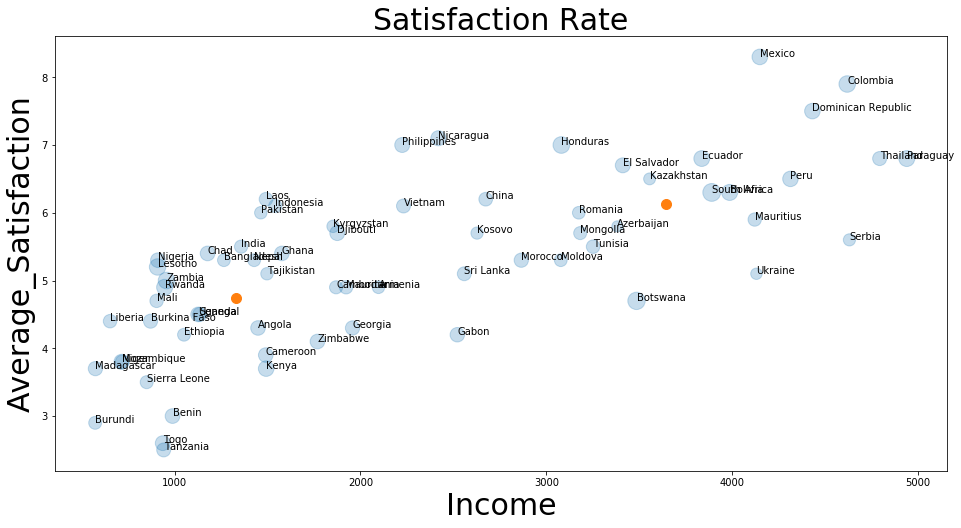

In [16]:
#make the scater of 2 variables and its clusters 
clusters = k_means.cluster_centers_
fig, axes = plt.subplots(figsize = (16, 8))
plt.scatter(poor_mediam['avg_income'], poor_mediam['avg_satisfaction'], s = poor_mediam['income_inequality']*5, alpha=.25)
plt.scatter(clusters[:,0], clusters[:,1], s =100)
plt.title('Satisfaction Rate', fontsize=30)
plt.xlabel('Income', fontsize=30)
plt.ylabel('Average_Satisfaction', fontsize=30)
for k,row in poor_mediam.iterrows():
    plt.text(row['avg_income'], row['avg_satisfaction'], row['country'])

### conclusion <br>
* as you see Satisfaction will increase when Income increase and decrease when income decrease with people who have income < 5000